**Students Performance Prediction**

**(1) Loading Dataset**

In [2]:
import pandas as pd
df=pd.read_csv("student_data_corrected.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

**(2) One Hot Encoding**

In [4]:
pip install --upgrade scikit-learn


In [5]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Separate features for encoding
label_encode_columns = ['sex', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
                        'nursery', 'higher', 'internet', 'romantic']
one_hot_encode_columns = ['school', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian']

# Apply Label Encoding
label_encoder = LabelEncoder()
for column in label_encode_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Corrected parameter
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[one_hot_encode_columns]),
                                columns=one_hot_encoder.get_feature_names_out(one_hot_encode_columns))

# Combine data with one-hot encoded columns
data = pd.concat([df.drop(columns=one_hot_encode_columns), one_hot_encoded], axis=1)

# Display the processed data
data

,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,U,0,4,4,2,2,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,17,U,1,1,1,1,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,15,U,1,1,1,1,2,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,15,U,1,4,2,1,3,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,16,U,1,3,3,1,2,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,R,1,2,3,1,3,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
645,0,18,U,1,3,1,1,2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
646,0,18,U,1,1,1,2,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
647,1,17,U,1,3,1,2,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**(3) Checking Null Values**

In [6]:
data.isnull().sum()

,0
sex,0
age,0
address,0
Pstatus,0
Medu,0
Fedu,0
traveltime,0
studytime,0
failures,0
schoolsup,0


**(4) Checking Correlations**

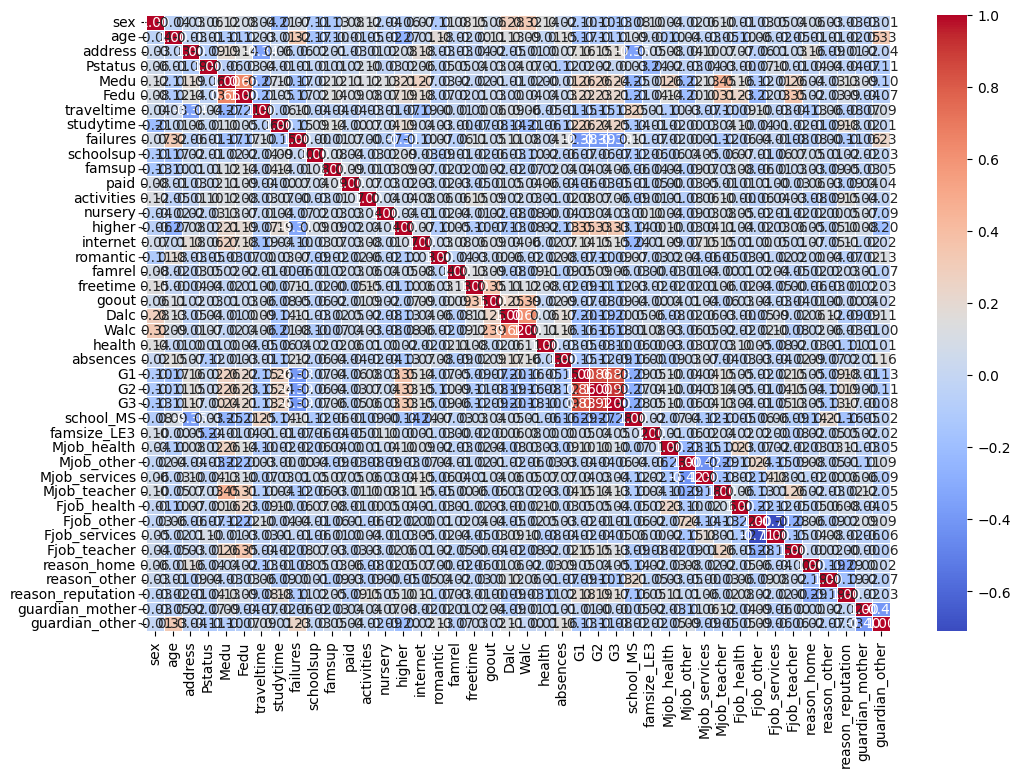

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'address' column
data['address'] = label_encoder.fit_transform(data['address'])

# Now calculate the correlation matrix again
correlation_matrix = data.corr()

# Plot heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


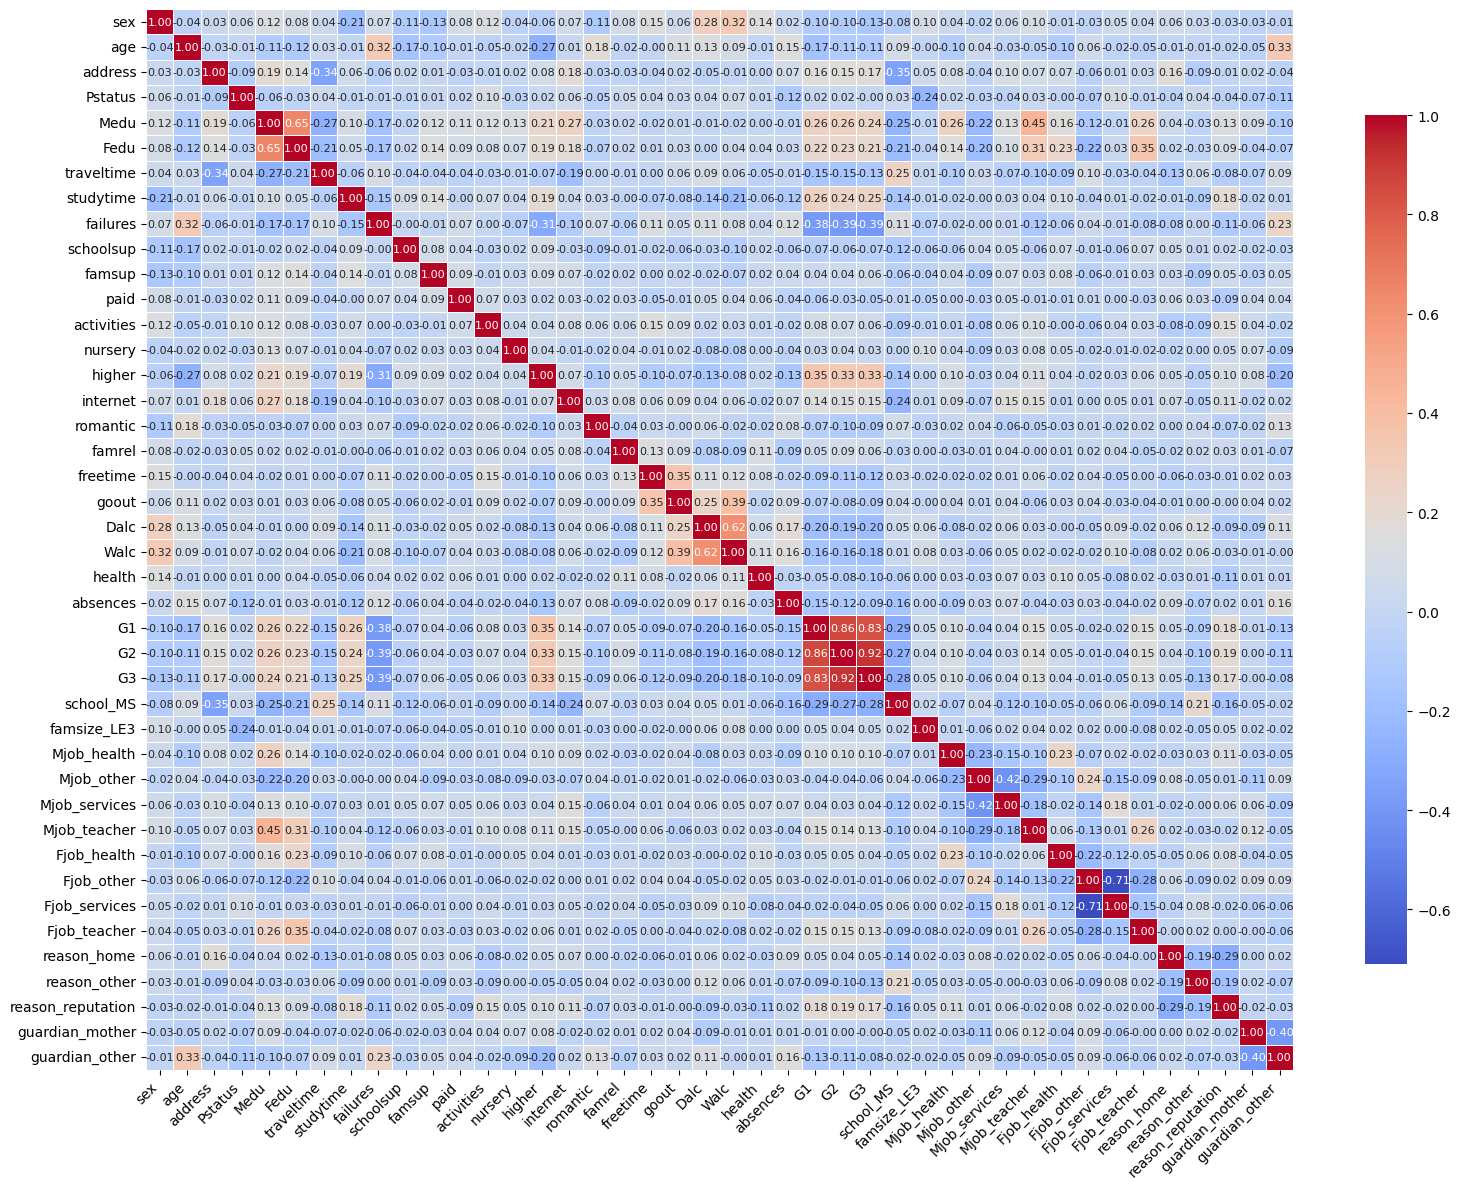

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a larger plot with more space
plt.figure(figsize=(16, 12))

# Heatmap with improved readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 8})  # smaller annotation font

# Rotate the labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

# Adjust the layout to make space for the labels and avoid overlap
plt.tight_layout()
plt.show()


**(5) Checking Multicollinearity Of Selected Features**

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Example: Load your dataset
df =data

# Define the independent variables (exclude the target variable)
features = df[["G2","failures","absences","Medu", "Fedu", "studytime", "schoolsup", "higher", "internet"
]]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)


     Feature        VIF
0         G2  15.266923
1   failures   1.131437
2   absences   1.622407
3       Medu  10.907202
4       Fedu   9.378210
5  studytime   6.618718
6  schoolsup   1.147792
7     higher  10.270855
8   internet   4.559873


**(6) Removing Medu**

In [10]:
# Drop the 'Medu' column from your dataset
df = df.drop(columns=['Medu'])

# Check the updated dataframe
print(df.head())


   sex  age  address  Pstatus  Fedu  traveltime  studytime  failures  \
0    0   18        1        0     4           2          2         0   
1    0   17        1        1     1           1          2         0   
2    0   15        1        1     1           1          2         0   
3    0   15        1        1     2           1          3         0   
4    0   16        1        1     3           1          2         0   

   schoolsup  famsup  ...  Mjob_teacher  Fjob_health  Fjob_other  \
0          1       0  ...           0.0          0.0         0.0   
1          0       1  ...           0.0          0.0         1.0   
2          1       0  ...           0.0          0.0         1.0   
3          0       1  ...           0.0          0.0         0.0   
4          0       1  ...           0.0          0.0         1.0   

   Fjob_services  Fjob_teacher  reason_home  reason_other  reason_reputation  \
0            0.0           1.0          0.0           0.0                0.0  

In [11]:
df[['G2', 'failures', 'absences', 'Fedu', 'studytime', 'schoolsup', 'higher', 'internet']]

,G2,failures,absences,Fedu,studytime,schoolsup,higher,internet
0,11,0,4,4,2,1,1,0
1,11,0,2,1,2,0,1,1
2,13,0,6,1,2,1,1,1
3,14,0,0,2,3,0,1,1
4,13,0,0,3,2,0,1,0
...,...,...,...,...,...,...,...,...
644,11,1,4,3,3,0,1,1
645,15,0,4,1,2,0,1,1
646,12,0,6,1,2,0,1,0
647,10,0,6,1,1,0,1,1


**(7) Traning and Testing Set**

In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[["G2", "failures", "absences","Fedu", "studytime", "schoolsup","higher","internet"]]
y = df["G3"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (519, 8)
Testing set shape: (130, 8)


**(8) Fitting with Linear Regression Model**

In [13]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)


LinearRegression()

**(9) Model Evaluation**

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test data
y_pred = linear_reg_model.predict(X_test)

# R-squared
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Adjusted R-squared
n = X_test.shape[0]  # number of test samples
p = X_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the evaluation metrics
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared: {adj_r2}")


R-squared: 0.8740999361803617
Mean Absolute Error (MAE): 0.7325231030725007
Mean Squared Error (MSE): 1.2277416637711043
Root Mean Squared Error (RMSE): 1.108035046273855
Adjusted R-squared: 0.8657759650187328


**(10) Model Accuracy**

In [15]:
# Calculate R-squared on test set
r_squared_test = linear_reg_model.score(X_test, y_test)

# Convert R-squared to percentage
accuracy_percentage = r_squared_test * 100
print(f"Model Accuracy: {accuracy_percentage:.2f}%")


Model Accuracy: 87.41%


**(11) HyperParameter Tuning**

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Defining models and their hyperparameters to search over
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Ridge Regression': Ridge()
}

# Example of hyperparameters grid for each model
param_grid = {
    'Linear Regression': {},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]},
    'Decision Tree': {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Support Vector Regressor': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']},
    'Ridge Regression': {'alpha': [0.1, 1, 10]}
}

# Initialize results dictionary to store scores and MSE
results = {}

# Loop over models and grid search
for model_name in models:
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grid[model_name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    # Make predictions on test set for MSE evaluation
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Save the results for each model
    results[model_name] = {
        'Best Parameters': best_params,
        'Best Cross-Validation Score (R^2)': best_score,
        'Test MSE': mse,
        'Best Model Accuracy': best_model.score(X_test, y_test) * 100  # Accuracy in percentage
    }

# Displaying the results
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Best Parameters: {result['Best Parameters']}")
    print(f"  Best Cross-Validation Score (R^2): {result['Best Cross-Validation Score (R^2)'] * 100:.2f}%")
    print(f"  Test MSE: {result['Test MSE']:.4f}")
    print(f"  Best Model Accuracy: {result['Best Model Accuracy']:.2f}%\n")

# Find the best model
best_model_name = max(results, key=lambda k: results[k]['Best Model Accuracy'])
print(f"The Best Model is: {best_model_name}")
print(f"Why? Because it has the highest accuracy: {results[best_model_name]['Best Model Accuracy']:.2f}%")


Linear Regression:
  Best Parameters: {}
  Best Cross-Validation Score (R^2): -173.06%
  Test MSE: 1.2277
  Best Model Accuracy: 87.41%

Random Forest:
  Best Parameters: {'max_depth': 5, 'n_estimators': 50}
  Best Cross-Validation Score (R^2): -169.12%
  Test MSE: 1.5748
  Best Model Accuracy: 83.85%

Decision Tree:
  Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
  Best Cross-Validation Score (R^2): -193.53%
  Test MSE: 1.5737
  Best Model Accuracy: 83.86%

Support Vector Regressor:
  Best Parameters: {'C': 0.1, 'kernel': 'linear'}
  Best Cross-Validation Score (R^2): -175.27%
  Test MSE: 1.1970
  Best Model Accuracy: 87.73%

K-Nearest Neighbors:
  Best Parameters: {'n_neighbors': 10, 'weights': 'uniform'}
  Best Cross-Validation Score (R^2): -190.73%
  Test MSE: 1.5852
  Best Model Accuracy: 83.74%

Ridge Regression:
  Best Parameters: {'alpha': 10}
  Best Cross-Validation Score (R^2): -172.60%
  Test MSE: 1.2278
  Best Model Accuracy: 87.41%

The Best Model is: Support V

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the model
svr = SVR()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Best model
best_model = grid_search.best_estimator_

# Evaluate on the test data
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validation Score (R^2):", best_score)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

# Calculate accuracy
best_model_accuracy = best_model.score(X_test, y_test) * 100
print(f"Best Model Accuracy: {best_model_accuracy:.2f}%")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score (R^2): -1.7356293965361953
Test MSE: 1.184975501809717
Test R^2: 0.8784854373644801
Best Model Accuracy: 87.85%


**(12) Model Evaluation Of My Best Model**

In [17]:
# Evaluating the model with test data
y_pred = grid_search.predict(X_test)

# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# R-squared (R²)
r2 = grid_search.score(X_test, y_test)

# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


Test MSE: 1.2278105343567653
Test R²: -1.2278105343567653
Mean Absolute Error (MAE): 0.7318553185468412


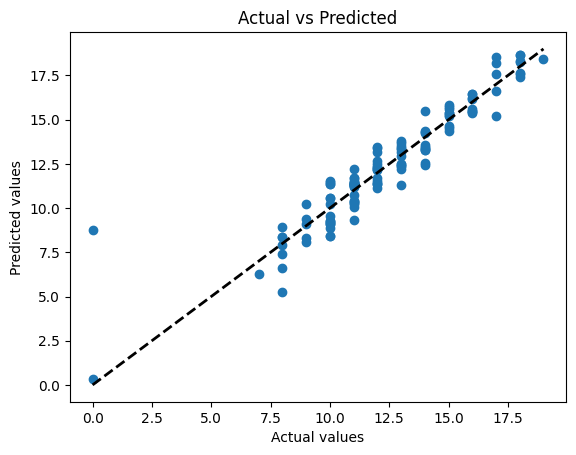

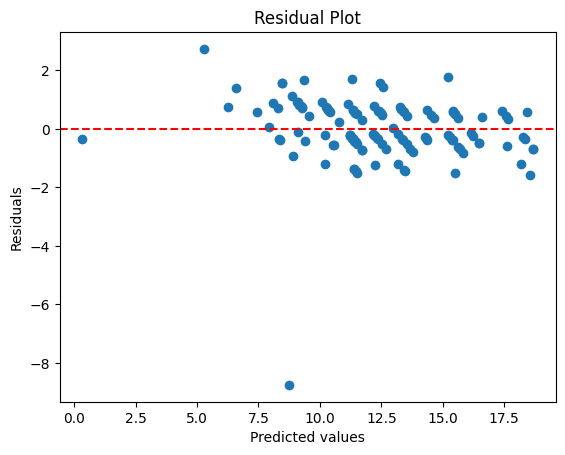

In [18]:
import matplotlib.pyplot as plt

# Actual vs Predicted plot
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**(13) Compairing my Best Model With all other optimal Models**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, y_train, X_test, y_test are already defined from your dataset

# Define the Linear Regression model
linear_regressor = LinearRegression()

# Define the hyperparameter grid for linear regression (although LinearRegression does not have many parameters to tune, this is an example with 'fit_intercept')
param_grid = {
    'fit_intercept': [True, False],  # Whether to include the intercept in the model
}

# Perform GridSearchCV to find the best parameters for Linear Regression
grid_search = GridSearchCV(linear_regressor, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the model's performance on the test set
y_pred = grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
model_accuracy = test_r2 * 100  # Convert R-squared to percentage

# Print the results
print(f"Best Parameters for Linear Regression: {best_params}")
print(f"Best Cross-Validation Score (R^2): {best_score}")
print(f"Test MSE: {test_mse}")
print(f"Test R^2: {test_r2}")
print(f"Model Accuracy (R^2 as percentage): {model_accuracy}%")


Best Parameters for Linear Regression: {'fit_intercept': False}
Best Cross-Validation Score (R^2): -1.7184790000195111
Test MSE: 1.2213153185046342
Test R^2: 0.8747589325336259
Model Accuracy (R^2 as percentage): 87.47589325336259%


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, y_train, X_test, y_test are already defined from your dataset

# Define the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Perform GridSearchCV to find the best parameters for Random Forest
grid_search_rf = GridSearchCV(rf_regressor, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Get the model's performance on the test set
y_pred_rf = grid_search_rf.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
test_r2_rf = r2_score(y_test, y_pred_rf)
model_accuracy_rf = test_r2_rf * 100  # Convert R-squared to percentage

# Print the results
print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Score (R^2): {best_score_rf}")
print(f"Test MSE: {test_mse_rf}")
print(f"Test R^2: {test_r2_rf}")
print(f"Model Accuracy (R^2 as percentage): {model_accuracy_rf}%")


Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score (R^2): -1.6055323546454647
Test MSE: 1.4947010834518009
Test R^2: 0.8467243009251266
Model Accuracy (R^2 as percentage): 84.67243009251266%


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize DecisionTreeRegressor model
dt_model = DecisionTreeRegressor()

# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 5, 10, 20, 50],  # Depth of tree
    'min_samples_split': [2, 5, 10],    # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples at leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Features to consider for splitting
}

# Set up GridSearchCV to find the best parameters based on R^2 score
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)

# Fit the model on training data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params_dt = grid_search_dt.best_params_

# Display the best parameters
print(f"Best Parameters for Decision Tree: {best_params_dt}")

# Use the best model found by GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

# Predict on test data
y_pred_dt = best_dt_model.predict(X_test)

# Calculate evaluation metrics for the model
test_mse_dt = mean_squared_error(y_test, y_pred_dt)
test_r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Display evaluation metrics
print(f"Test MSE for Decision Tree: {test_mse_dt}")
print(f"Test R^2 for Decision Tree: {test_r2_dt}")
print(f"Mean Absolute Error for Decision Tree: {mae_dt}")

# Model accuracy (Percentage)
accuracy_dt = best_dt_model.score(X_test, y_test) * 100
print(f"Best Decision Tree Model Accuracy: {accuracy_dt}%")


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
225 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize KNeighborsRegressor model
knn_model = KNeighborsRegressor()

# Define the parameter grid to search over
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],              # Number of neighbors to use
    'weights': ['uniform', 'distance'],            # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute nearest neighbors
}

# Set up GridSearchCV to find the best parameters based on R^2 score
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='r2', verbose=2)

# Fit the model on training data
grid_search_knn.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params_knn = grid_search_knn.best_params_

# Display the best parameters
print(f"Best Parameters for K-Nearest Neighbors: {best_params_knn}")

# Use the best model found by GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

# Predict on test data
y_pred_knn = best_knn_model.predict(X_test)

# Calculate evaluation metrics for the model
test_mse_knn = mean_squared_error(y_test, y_pred_knn)
test_r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Display evaluation metrics
print(f"Test MSE for K-Nearest Neighbors: {test_mse_knn}")
print(f"Test R^2 for K-Nearest Neighbors: {test_r2_knn}")
print(f"Mean Absolute Error for K-Nearest Neighbors: {mae_knn}")

# Model accuracy (Percentage)
accuracy_knn = best_knn_model.score(X_test, y_test) * 100
print(f"Best K-Nearest Neighbors Model Accuracy: {accuracy_knn}%")


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=3, weights=distance; total time=

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline that scales the data and applies Ridge regression
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('ridge', Ridge())             # Ridge Regression model
])

# Define the parameter grid to search over
param_grid_ridge = {
    'ridge__alpha': [0.1, 1, 10, 100, 1000],             # Regularization strength
    'ridge__fit_intercept': [True, False],               # Whether to calculate the intercept for this model
}

# Set up GridSearchCV to find the best parameters based on R^2 score
grid_search_ridge = GridSearchCV(estimator=pipeline_ridge, param_grid=param_grid_ridge, cv=5, scoring='r2', verbose=2)

# Fit the model on training data
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params_ridge = grid_search_ridge.best_params_

# Display the best parameters
print(f"Best Parameters for Ridge Regression: {best_params_ridge}")

# Use the best model found by GridSearchCV
best_ridge_model = grid_search_ridge.best_estimator_

# Predict on test data
y_pred_ridge = best_ridge_model.predict(X_test)

# Calculate evaluation metrics for the model
test_mse_ridge = mean_squared_error(y_test, y_pred_ridge)
test_r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Display evaluation metrics
print(f"Test MSE for Ridge Regression: {test_mse_ridge}")
print(f"Test R^2 for Ridge Regression: {test_r2_ridge}")
print(f"Mean Absolute Error for Ridge Regression: {mae_ridge}")

# Model accuracy (Percentage)
accuracy_ridge = best_ridge_model.score(X_test, y_test) * 100
print(f"Best Ridge Regression Model Accuracy: {accuracy_ridge}%")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........ridge__alpha=0.1, ridge__fit_intercept=True; total time=   0.0s
[CV] END ........ridge__alpha=0.1, ridge__fit_intercept=True; total time=   0.0s
[CV] END ........ridge__alpha=0.1, ridge__fit_intercept=True; total time=   0.0s
[CV] END ........ridge__alpha=0.1, ridge__fit_intercept=True; total time=   0.0s
[CV] END ........ridge__alpha=0.1, ridge__fit_intercept=True; total time=   0.0s
[CV] END .......ridge__alpha=0.1, ridge__fit_intercept=False; total time=   0.0s
[CV] END .......ridge__alpha=0.1, ridge__fit_intercept=False; total time=   0.0s
[CV] END .......ridge__alpha=0.1, ridge__fit_intercept=False; total time=   0.0s
[CV] END .......ridge__alpha=0.1, ridge__fit_intercept=False; total time=   0.0s
[CV] END .......ridge__alpha=0.1, ridge__fit_intercept=False; total time=   0.0s
[CV] END ..........ridge__alpha=1, ridge__fit_intercept=True; total time=   0.0s
[CV] END ..........ridge__alpha=1, ridge__fit_in

Mean Squared Error (MSE): 1.2278
Root Mean Squared Error (RMSE): 1.1081
Mean Absolute Error (MAE): 0.7319
R² Score: 0.8741


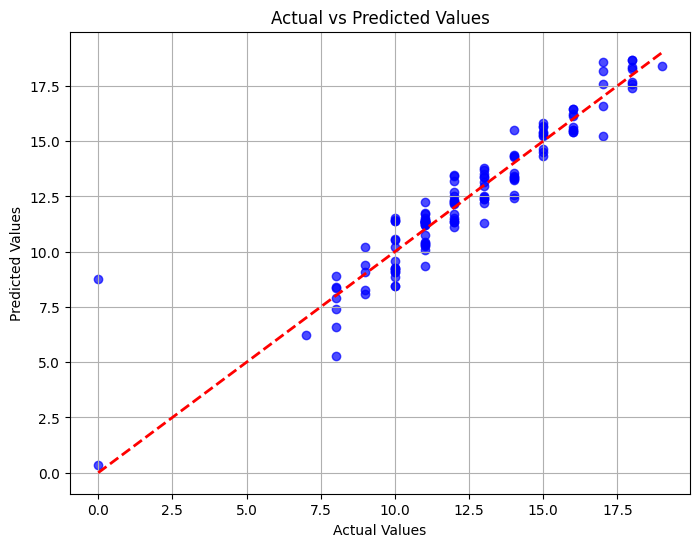

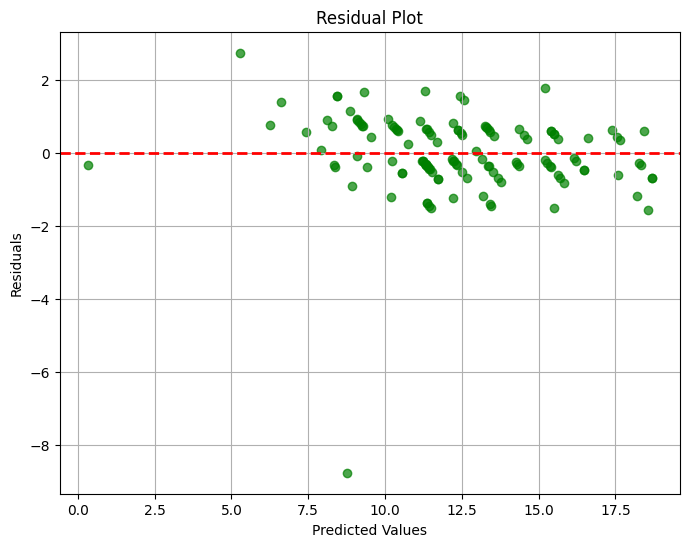

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='g')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [25]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Best parameters for SVR
best_params_svr = {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}

# Create the SVR model with the best parameters
svr_best_model = SVR(C=best_params_svr['C'], epsilon=best_params_svr['epsilon'],
                     gamma=best_params_svr['gamma'], kernel=best_params_svr['kernel'])

# Fit the model to the training data
svr_best_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = svr_best_model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_pred_svr)
test_r2 = r2_score(y_test, y_pred_svr)

# Print results
print("Test MSE:", test_mse)
print("Test R²:", test_r2)

# Calculate accuracy (R² as percentage)
accuracy = test_r2 * 100
print(f"SVR Model Accuracy (R² as percentage): {accuracy:.2f}%")


Test MSE: 1.184975501809717
Test R²: 0.8784854373644801
SVR Model Accuracy (R² as percentage): 87.85%


In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (using 5 folds here)
cv_scores = cross_val_score(svr_best_model, X, y, cv=5, scoring='r2')

# Analyze variation
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())
print("R² Standard Deviation:", cv_scores.std())


Cross-Validation R² Scores: [0.79796887 0.75730354 0.84034813 0.88188362 0.79890438]
Mean R²: 0.8152817070652102
R² Standard Deviation: 0.04241122516386263


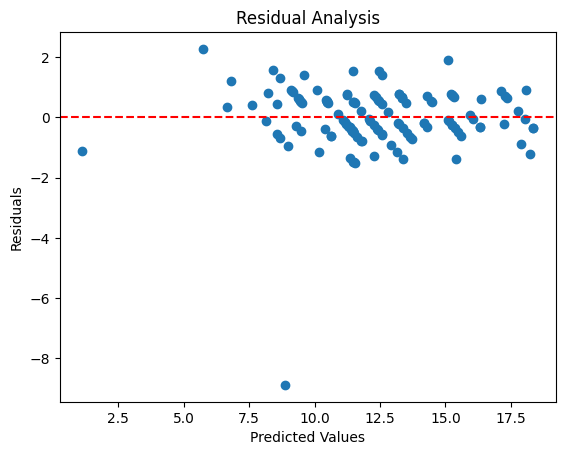

In [27]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_svr
plt.scatter(y_pred_svr, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


**(14) Checking Importance of My features to my model**

In [28]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svr_best_model, X_test, y_test, scoring='r2', n_repeats=10, random_state=42)
for i in result.importances_mean.argsort()[::-1]:
    print(f"Feature: {X.columns[i]}, Importance: {result.importances_mean[i]:.4f}")


Feature: G2, Importance: 1.7085
Feature: failures, Importance: 0.0039
Feature: higher, Importance: 0.0025
Feature: studytime, Importance: 0.0021
Feature: schoolsup, Importance: 0.0013
Feature: absences, Importance: 0.0009
Feature: internet, Importance: 0.0001
Feature: Fedu, Importance: -0.0001


**(15) Doing Prediction By Different User Interfaces**

In [ ]:
G2=int(input())
failures=int(input())
absences=int(input())
Fedu=int(input())
studytime=int(input())
schoolsup=int(input())
higher=int(input())
internet=int(input())

new_data=[[G2,failures,absences,Fedu,studytime,schoolsup,higher,internet]]
predicted_price = svr_best_model.predict(new_data)
print(f"Predicted Final exam : {predicted_price[0]}")

 11
 0
 4
 4
 2
 1
 1
 0


Predicted Final exam : 11.112857624177176


C:\Users\adeel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [ ]:
joblib.dump(svr_best_model, 'svr_best_model.pkl')


['svr_best_model.pkl']

In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import joblib  # To load the pre-trained model (ensure you have saved the model)

# Load your trained model (replace with your actual model file path)
model = joblib.load('svr_best_model.pkl')  # Make sure to save your model first

def predict_marks():
    try:
        # Get the input values from the user
        hours_studied = float(entry_hours.get())

        # Prediction logic (assuming a simple linear regression model)
        prediction = model.predict(np.array([[[G2,failures,absences,Fedu,studytime,schoolsup,higher,internet]]]))

        # Display the result in the result_label
        result_label.config(text=f"Predicted Marks: {prediction[0]:.2f}")

    except ValueError:
        messagebox.showerror("Input Error", "Please enter a valid number.")

# Setting up the main window
root = tk.Tk()
root.title("Student Marks Prediction")

# Adding a label
label = tk.Label(root, text="Enter Hours Studied:")
label.pack(pady=10)

# Adding a text entry box for user input
entry_hours = tk.Entry(root)
entry_hours.pack(pady=5)

# Adding a predict button
predict_button = tk.Button(root, text="Predict Marks", command=predict_marks)
predict_button.pack(pady=20)

# Label to show prediction results
result_label = tk.Label(root, text="Predicted Marks: N/A")
result_label.pack(pady=10)

# Run the application
root.mainloop()


C:\Users\adeel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
import joblib  # to load the model

# Load your trained SVR model (make sure to replace the file path)
svr_best_model = joblib.load('svr_best_model.pkl')

# Take user inputs
G2 = int(input("Enter G2 (Grade in second period): (numeric: from 0 to 20)"))
failures = int(input("Enter number of failures: (numeric: n if 1<=n<3, else 4)"))
absences = int(input("Enter number of absences: (numeric: from 0 to 93)"))
Fedu = int(input("Enter Father's education level:(1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) "))
studytime = int(input("Enter study time (1-4): "))
schoolsup = int(input("Does the student receive school support? (1 for Yes, 0 for No): "))
higher = int(input("Does the student aim for higher education? (1 for Yes, 0 for No): "))
internet = int(input("Does the student have internet access? (1 for Yes, 0 for No): "))

# Prepare the new data for prediction
new_data = [[G2, failures, absences, Fedu, studytime, schoolsup, higher, internet]]

# Predict the final exam score
predicted_price = svr_best_model.predict(new_data)

# Print the predicted final exam score
print(f"Predicted Final exam score: {predicted_price[0]:.2f}")


Enter G2 (Grade in second period):  15
Enter number of failures:  2
Enter number of absences:  2
Enter Father's education level:  3
Enter study time (1-4):  3
Does the student receive school support? (1 for Yes, 0 for No):  1
Does the student aim for higher education? (1 for Yes, 0 for No):  1
Does the student have internet access? (1 for Yes, 0 for No):  1


Predicted Final exam score: 14.76


C:\Users\adeel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np

# Load your trained SVR model (replace the file path)
svr_best_model = joblib.load('svr_best_model.pkl')

def predict_final_exam():
    try:
        # Get user inputs
        G2 = int(entry_G2.get())
        failures = int(entry_failures.get())
        absences = int(entry_absences.get())
        Fedu = int(entry_Fedu.get())
        studytime = int(entry_studytime.get())
        schoolsup = int(entry_schoolsup.get())
        higher = int(entry_higher.get())
        internet = int(entry_internet.get())

        # Prepare the new data for prediction
        new_data = [[G2, failures, absences, Fedu, studytime, schoolsup, higher, internet]]

        # Predict the final exam score
        predicted_price = svr_best_model.predict(new_data)

        # Display the predicted score in the result label
        result_label.config(text=f"Predicted Final exam score: {predicted_price[0]:.2f}")

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")

# Setting up the main window
root = tk.Tk()
root.title("Student Final Exam Prediction")

# Adding labels and entry boxes for user inputs
label_G2 = tk.Label(root, text="Enter G2 (Grade in second period):(numeric: from 0 to 20)")
label_G2.pack(pady=5)
entry_G2 = tk.Entry(root)
entry_G2.pack(pady=5)

label_failures = tk.Label(root, text="Enter number of failures:(numeric: n if 1<=n<3, else 4)")
label_failures.pack(pady=5)
entry_failures = tk.Entry(root)
entry_failures.pack(pady=5)

label_absences = tk.Label(root, text="Enter number of absences:(numeric: from 0 to 93)")
label_absences.pack(pady=5)
entry_absences = tk.Entry(root)
entry_absences.pack(pady=5)

label_Fedu = tk.Label(root, text="Enter Father's education level:(1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)")
label_Fedu.pack(pady=5)
entry_Fedu = tk.Entry(root)
entry_Fedu.pack(pady=5)

label_studytime = tk.Label(root, text="Enter study time (1-4):")
label_studytime.pack(pady=5)
entry_studytime = tk.Entry(root)
entry_studytime.pack(pady=5)

label_schoolsup = tk.Label(root, text="Does the student receive school support? (1 for Yes, 0 for No):")
label_schoolsup.pack(pady=5)
entry_schoolsup = tk.Entry(root)
entry_schoolsup.pack(pady=5)

label_higher = tk.Label(root, text="Does the student aim for higher education? (1 for Yes, 0 for No):")
label_higher.pack(pady=5)
entry_higher = tk.Entry(root)
entry_higher.pack(pady=5)

label_internet = tk.Label(root, text="Does the student have internet access? (1 for Yes, 0 for No):")
label_internet.pack(pady=5)
entry_internet = tk.Entry(root)
entry_internet.pack(pady=5)

# Button to make prediction
predict_button = tk.Button(root, text="Predict Final Exam Score", command=predict_final_exam)
predict_button.pack(pady=20)

# Label to display result
result_label = tk.Label(root, text="Predicted Final Exam Score: N/A")
result_label.pack(pady=10)

# Run the application
root.mainloop()


C:\Users\adeel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QPushButton, QVBoxLayout, QMessageBox
import joblib
import numpy as np

# Load your trained SVR model (make sure to replace the file path)
svr_best_model = joblib.load('svr_best_model.pkl')

class StudentPredictionApp(QWidget):
    def __init__(self):
        super().__init__()

        # Set the title and size of the window
        self.setWindowTitle('Student Final Exam Prediction')
        self.setGeometry(100, 100, 300, 400)

        # Create the layout and widgets
        self.layout = QVBoxLayout()

        # G2 input
        self.label_G2 = QLabel('Enter G2 (Grade in second period):')
        self.entry_G2 = QLineEdit()
        self.layout.addWidget(self.label_G2)
        self.layout.addWidget(self.entry_G2)

        # Failures input
        self.label_failures = QLabel('Enter number of failures:')
        self.entry_failures = QLineEdit()
        self.layout.addWidget(self.label_failures)
        self.layout.addWidget(self.entry_failures)

        # Absences input
        self.label_absences = QLabel('Enter number of absences:')
        self.entry_absences = QLineEdit()
        self.layout.addWidget(self.label_absences)
        self.layout.addWidget(self.entry_absences)

        # Father's education input
        self.label_Fedu = QLabel('Enter Father\'s education level:')
        self.entry_Fedu = QLineEdit()
        self.layout.addWidget(self.label_Fedu)
        self.layout.addWidget(self.entry_Fedu)

        # Studytime input
        self.label_studytime = QLabel('Enter study time (1-4):')
        self.entry_studytime = QLineEdit()
        self.layout.addWidget(self.label_studytime)
        self.layout.addWidget(self.entry_studytime)

        # Schoolsup input
        self.label_schoolsup = QLabel('Does the student receive school support? (1 for Yes, 0 for No):')
        self.entry_schoolsup = QLineEdit()
        self.layout.addWidget(self.label_schoolsup)
        self.layout.addWidget(self.entry_schoolsup)

        # Higher education input
        self.label_higher = QLabel('Does the student aim for higher education? (1 for Yes, 0 for No):')
        self.entry_higher = QLineEdit()
        self.layout.addWidget(self.label_higher)
        self.layout.addWidget(self.entry_higher)

        # Internet access input
        self.label_internet = QLabel('Does the student have internet access? (1 for Yes, 0 for No):')
        self.entry_internet = QLineEdit()
        self.layout.addWidget(self.label_internet)
        self.layout.addWidget(self.entry_internet)

        # Button to make prediction
        self.predict_button = QPushButton('Predict Final Exam Score')
        self.predict_button.clicked.connect(self.predict_final_exam)
        self.layout.addWidget(self.predict_button)

        # Result label
        self.result_label = QLabel('Predicted Final Exam Score: N/A')
        self.layout.addWidget(self.result_label)

        # Set the layout for the window
        self.setLayout(self.layout)

    def predict_final_exam(self):
        try:
            # Get user inputs
            G2 = int(self.entry_G2.text())
            failures = int(self.entry_failures.text())
            absences = int(self.entry_absences.text())
            Fedu = int(self.entry_Fedu.text())
            studytime = int(self.entry_studytime.text())
            schoolsup = int(self.entry_schoolsup.text())
            higher = int(self.entry_higher.text())
            internet = int(self.entry_internet.text())

            # Prepare the new data for prediction
            new_data = [[G2, failures, absences, Fedu, studytime, schoolsup, higher, internet]]

            # Predict the final exam score
            predicted_price = svr_best_model.predict(new_data)

            # Display the predicted score in the result label
            self.result_label.setText(f"Predicted Final exam score: {predicted_price[0]:.2f}")

        except ValueError:
            # Show error message if inputs are invalid
            QMessageBox.warning(self, 'Input Error', 'Please enter valid numeric values.')

if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = StudentPredictionApp()
    window.show()
    sys.exit(app.exec_())


C:\Users\adeel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


SystemExit: 0

C:\Users\adeel\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import kivy
from kivy.app import App
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.label import Label
from kivy.uix.textinput import TextInput
from kivy.uix.button import Button
from kivy.uix.popup import Popup
import joblib

kivy.require('2.0.0')  # Ensure you are using a supported version

# Load your trained SVR model (make sure to replace the file path)
svr_best_model = joblib.load('svr_best_model.pkl')

class StudentPredictionApp(App):
    def build(self):
        self.layout = BoxLayout(orientation='vertical', padding=10, spacing=10)

        # Title Label
        self.title_label = Label(text="Student Final Exam Prediction", font_size=24, bold=True, color=(0, 0, 1, 1))
        self.layout.add_widget(self.title_label)

        # G2 input
        self.label_G2 = Label(text="Enter G2 (Grade in second period):")
        self.layout.add_widget(self.label_G2)
        self.entry_G2 = TextInput(multiline=False, input_filter='int')
        self.layout.add_widget(self.entry_G2)

        # Failures input
        self.label_failures = Label(text="Enter number of failures:")
        self.layout.add_widget(self.label_failures)
        self.entry_failures = TextInput(multiline=False, input_filter='int')
        self.layout.add_widget(self.entry_failures)

        # Absences input
        self.label_absences = Label(text="Enter number of absences:")
        self.layout.add_widget(self.label_absences)
        self.entry_absences = TextInput(multiline=False, input_filter='int')
        self.layout.add_widget(self.entry_absences)

        # Father's education input
        self.label_Fedu = Label(text="Enter Father's education level:")
        self.layout.add_widget(self.label_Fedu)
        self.entry_Fedu = TextInput(multiline=False, input_filter='int')
        self.layout.add_widget(self.entry_Fedu)

        # Studytime input
        self.label_studytime = Label(text="Enter study time (1-4):")
        self.layout.add_widget(self.label_studytime)
        self.entry_studytime = TextInput(multiline=False, input_filter='int')
        self.layout.add_widget(self.entry_studytime)

        # Schoolsup input
        self.label_schoolsup = Label(text="Does the student receive school support? (1 for Yes, 0 for No):")
        self.layout.add_widget(self.label_schoolsup)
        self.entry_schoolsup = TextInput(multiline=False, input_filter='int')
        self.layout.add_widget(self.entry_schoolsup)

        # Higher education input
        self.label_higher = Label(text="Does the student aim for higher education? (1 for Yes, 0 for No):")
        self.layout.add_widget(self.label_higher)
        self.entry_higher = TextInput(multiline=False, input_filter='int')
        self.layout.add_widget(self.entry_higher)

        # Internet access input
        self.label_internet = Label(text="Does the student have internet access? (1 for Yes, 0 for No):")
        self.layout.add_widget(self.label_internet)
        self.entry_internet = TextInput(multiline=False, input_filter='int')
        self.layout.add_widget(self.entry_internet)

        # Button to make prediction
        self.predict_button = Button(text="Predict Final Exam Score", on_press=self.predict_final_exam)
        self.layout.add_widget(self.predict_button)

        # Result label
        self.result_label = Label(text="Predicted Final Exam Score: N/A", font_size=18)
        self.layout.add_widget(self.result_label)

        return self.layout

    def predict_final_exam(self, instance):
        try:
            # Get user inputs
            G2 = int(self.entry_G2.text)
            failures = int(self.entry_failures.text)
            absences = int(self.entry_absences.text)
            Fedu = int(self.entry_Fedu.text)
            studytime = int(self.entry_studytime.text)
            schoolsup = int(self.entry_schoolsup.text)
            higher = int(self.entry_higher.text)
            internet = int(self.entry_internet.text)

            # Prepare the new data for prediction
            new_data = [[G2, failures, absences, Fedu, studytime, schoolsup, higher, internet]]

            # Predict the final exam score
            predicted_price = svr_best_model.predict(new_data)

            # Display the predicted score in the result label
            self.result_label.text = f"Predicted Final exam score: {predicted_price[0]:.2f}"

        except ValueError:
            # Show error message in a popup if inputs are invalid
            popup = Popup(title='Input Error', content=Label(text='Please enter valid numeric values.'),
                          size_hint=(None, None), size=(400, 200))
            popup.open()

if __name__ == '__main__':
    StudentPredictionApp().run()


[INFO   ] [Logger      ] Record log in C:\Users\adeel\.kivy\logs\kivy_24-12-19_1.txt
[INFO   ] [deps        ] Successfully imported "kivy_deps.angle" 0.4.0
[INFO   ] [deps        ] Successfully imported "kivy_deps.glew" 0.3.1
[INFO   ] [deps        ] Successfully imported "kivy_deps.sdl2" 0.7.0
[INFO   ] [Kivy        ] v2.3.0
[INFO   ] [Kivy        ] Installed at "C:\Users\adeel\anaconda3\Lib\site-packages\kivy\__init__.py"
[INFO   ] [Python      ] v3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
[INFO   ] [Python      ] Interpreter at "C:\Users\adeel\anaconda3\python.exe"
[INFO   ] [Logger      ] Purge log fired. Processing...
[INFO   ] [Logger      ] Purge finished!
[INFO   ] [Factory     ] 195 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics s

OSError: source code not available

**(16) By Gradio**

In [29]:
import joblib
joblib.dump(svr_best_model, 'svr_best_model.pkl')


['svr_best_model.pkl']

In [30]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [31]:
import gradio as gr
import joblib

# Load the trained model
model = joblib.load('svr_best_model.pkl')

# Prediction function
def predict_performance(G2, failures, absences, Fedu, studytime, schoolsup, higher, internet):
    # Prepare input features as a single array
    input_features = [[G2, failures, absences, Fedu, studytime, schoolsup, higher, internet]]
    prediction = model.predict(input_features)
    return f"Predicted Marks: {prediction[0]:.2f}"

# Define Gradio interface
interface = gr.Interface(
    fn=predict_performance,  # Function to use for predictions
    inputs=[
        gr.Number(label="G2 (Second Period Grades from 0 to 20)"),
        gr.Number(label="Failures (Past Failures 1 if=<3, else 4)"),
        gr.Number(label="Absences from 0 to 93"),
        gr.Number(label="Fedu (Father's Education Level, 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)"),
        gr.Number(label="Study Time (Hours per Week 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)"),
        gr.Checkbox(label="Extra Educational Support  "),
        gr.Checkbox(label="Higher Education Aspiration "),
        gr.Checkbox(label="Internet Access "),
    ],
    outputs=gr.Text(label="Predicted Marks"),  # Display prediction as text
    title="Student Performance Prediction",
    description="Enter the required inputs to predict the final marks of a student based on various features."
)

# Launch the interface
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://06dd49df5b7b152f36.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
